In [1]:
# Lab - Pandas Basics

In [18]:
import pandas as pd
import os

In [73]:
DATA_FOLDER = './data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [74]:
print(items.columns)

Index([u'item_name', u'item_id', u'item_category_id'], dtype='object')


In [75]:
# Handling Date time
transactions["date"] = pd.to_datetime(transactions["date"], format="%d.%m.%Y")
transactions["yr"] = pd.DatetimeIndex(transactions["date"]).year  
transactions["month"] = pd.DatetimeIndex(transactions["date"]).month
transactions["qtr"] = pd.DatetimeIndex(transactions["date"]).quarter
transactions["doy"] = pd.DatetimeIndex(transactions["date"]).dayofyear
transactions["dt"] = pd.DatetimeIndex(transactions["date"]).day

In [76]:
print(transactions.head())

        date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

     yr  month  qtr  doy  dt  
0  2013      1    1    2   2  
1  2013      1    1    3   3  
2  2013      1    1    5   5  
3  2013      1    1    6   6  
4  2013      1    1   15  15  


In [77]:
# Sale in September
septSales = transactions[(transactions.month == 9) & (transactions.yr == 2014)].copy()
septSales['totsales'] = septSales.item_price * septSales.item_cnt_day
septSales[['shop_id','totsales']].groupby('shop_id', as_index = False).sum()['totsales'].max()

7982852.1999999564

In [55]:
summersales = transactions[(transactions.month.isin([6,7,8])) & (transactions.yr == 2014)].copy()
summersales['totsales'] = summersales.item_price * summersales.item_cnt_day

fin = summersales.merge(items, how = 'left', on = 'item_id')[['item_category_id','totsales']].\
    groupby('item_category_id', as_index=False).sum()
    
fin.loc[fin.totsales.argmax()].item_category_id

12.0

In [80]:
# items with 0 deviation

transactions['totsales'] = transactions.item_price * transactions.item_cnt_day
fin = transactions[['item_id','item_price']]
(fin.groupby('item_id').std()==0).sum()
(fin.groupby('item_id').nunique()==1).sum()['item_price']

5926

In [88]:
# per day
decshop25Sales = transactions[(transactions.month == 12) & (transactions.yr == 2014) & (transactions.shop_id == 25)].copy()
decshop25Sales = decshop25Sales[['dt','item_cnt_day']].groupby('dt',as_index= False).sum()
decshop25Sales.item_cnt_day.var(ddof =1)# unbiased estimate of variance

117167.70229885059

In [89]:
# Plotting and EDA

In [94]:
# load Data
# see the head transposed to see all columns names
train = transactions.copy()
train['Date'] = train.date
train.head().T

# Basic Stats
print 'Train min/max date: %s / %s' % (train.Date.min().date(), train.Date.max().date())
#print 'Test  min/max date: %s / %s' % ( test.Date.min().date(),  test.Date.max().date())
print ''
print 'Number of days in train: %d' % ((train.Date.max() - train.Date.min()).days + 1)
#print 'Number of days in test:  %d' % (( test.Date.max() -  test.Date.min()).days + 1)
print ''
print 'Train shape: %d rows' % train.shape[0]
#print 'Test shape: %d rows'  % test.shape[0]
#test.Date.value_counts()

Train min/max date: 2013-01-01 / 2015-10-31

Number of days in train: 1034

Train shape: 2935849 rows


In [96]:
# count by unique IDs
train.Date.value_counts()
# only 10 rows
train.Date.value_counts().head(10)


2013-12-28    9434
2013-12-29    9335
2014-12-30    9324
2013-12-30    9138
2014-12-31    8347
2014-12-27    8041
2013-12-31    7765
2013-02-23    7577
2014-12-28    7370
2013-12-21    6773
Name: Date, dtype: int64

In [99]:
# finding if combinations of columns == the ID
test_nunique = train.nunique()

import itertools

# This function looks for a combination of elements 
# with product of 639360 
def find_prod(data):
    # combinations of not more than 5 features
    for n in range(1, 5):
        # iterate through all combinations
        for c in itertools.combinations(range(len(data)), n):
            print(c)
            if data[list(c)].prod() == 639360:
                print test_nunique.index[c]
                return
    print 'Nothing found'

    
find_prod(test_nunique.values)

(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(9, 10)
(9, 11)
(9, 12)
(10, 11)
(10, 12)
(11, 12)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(

In [103]:
# alternately find columns such that their xazctly  'ID'  unique combinations of their values
import itertools

def find_ncombinations(data):
    # combinations of not more than 5 features
    for n in range(1, 5):
        for c in itertools.combinations(range(data.shape[1]), n):
            print c
            columns = train.columns[list(c)]
            if train[columns].drop_duplicates().shape[0] == 639360:
                print columns
                return
    print 'Nothing found'

    
find_ncombinations(train)
#But it will take forever to compute. So it is easier to find the combination manually.

(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(8, 9)
(8, 10)
(8, 11)
(8, 12)
(9, 10)
(9, 11)
(9, 12)
(10, 11)
(10, 12)
(11, 12)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(

KeyboardInterrupt: 

In [104]:
columns = ['KeywordId', 'AdGroupId', 'Device', 'Slot']
test[columns].drop_duplicates().shape


NameError: name 'test' is not defined

In [105]:
import seaborn as sns
sns.set(palette='pastel')
sns.set(font_scale=2)

In [106]:
train['date_diff'] =  (train.Date - train.Date.min()).dt.days

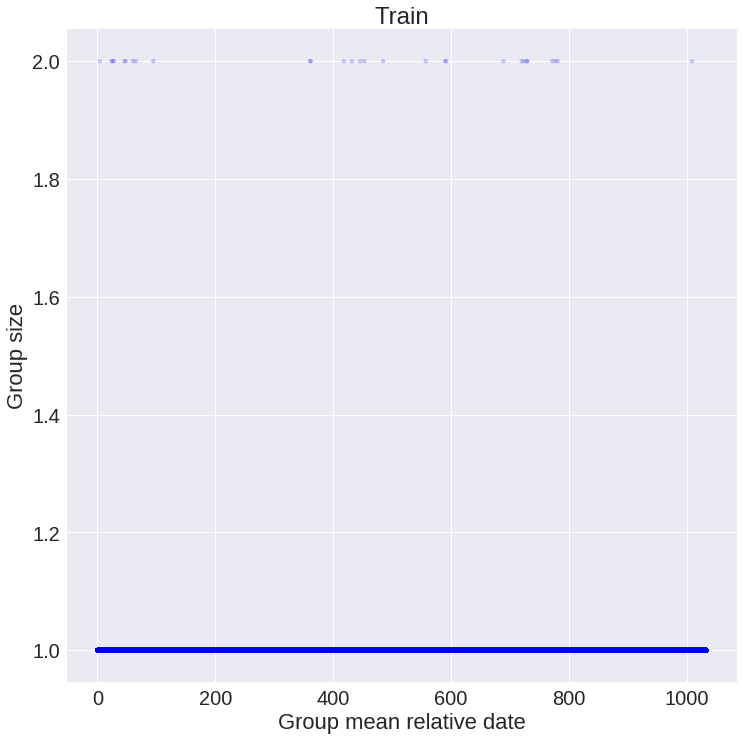

In [110]:
from matplotlib import pyplot as plt
%matplotlib inline
# group by the index, that we've found
g= train.groupby(['shop_id', 'item_id', 'date'])

# and for each index show average relative date versus 
# the number of rows with that index
plt.figure(figsize=(12,12))
plt.scatter(g.date_diff.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.title('Train');

In [111]:
# see for tests to see that the distributions are similar